#  1. Preguntas Teoricas

**a) ¿Qué es un paradigma de programación?** <br>
Es un estilo o manera de organizar y estructurar la programación de un software. Es un conjunto de métodos y principios que guían cómo resolver problemas computacionales de manera eficiente y coherente. 

**b) ¿En qué se basa la programación orientada a objetos?** <br>
Se basa en el uso de objetos y clases en lugar de usar funciones y lógica para modelar sistemas. Esto permite disminuir los errores y promover la reutilización de código.

**c) ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?** <br>
iteracion es cuando se repite una instruccion o procedimiento varias veces, en cambio recursion es cuando se llama una funcion se llama a si misma varias veces hasta resolver el problema. La diferencia es que la recursion necesita de un caso base, la iteracion no. Ahora, la iteracion tiende a tener notacion Big 0 lineal, en cambio la recursiva al llamarse repetidas veces puede tener una complejidad temporal exponencial.

**d) explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)** <br>
Tendremos que la 𝑂(1) tendra un tiempo constante,es decir no depende de la entrada y es el algoritmo mas rapido, en cambio el 𝑂(n) crece directamente proporcional (lineal) con el tamaño de sus entradas, por lo que si depende de estas.

**e)¿Cómo se calcula el orden en un programa que funciona por etapas?** <br>
Hay que calcular el orden de cada etapa del programa y el orden mas grande domina a todos, asi que este sera el orden del programa. El orden ascendente de comlejidades temporales es el siguiente: O(1) < O(log(n)) < O(n) < O(nlog(n)) < O(n2) < O(2n) < O(n!)


**f)¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?** <br>
Por cada vez que se llame la funcion a si misma, la base de la potencia aumenta, es decir si se llama dos veces su complejidad temporal es O (2 ^ N). si llama tres veces, entonces su complejidad temporal es O(3 ^ N) y así.

#  2. Caminos en una PCB


In [1]:

class CaminosPCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        PCB = [[0] * self.M for _ in range(self.N)]
        PCB[0][0] = 1
        self.grilla= PCB
        self.caminos = 0 

    def contarcaminos1(self,grilla):
        self.caminos = 0
        def buscar_caminos(grilla, i, j):
            if i == self.N-1 and j == self.M-1:
                self.caminos += 1
                return

            if i + 1 < self.N:
                nueva_grilla = [fila[:] for fila in grilla]
                nueva_grilla[i][j] = 0  
                nueva_grilla[i + 1][j] = 1 
                buscar_caminos(nueva_grilla, i + 1, j)

            if j + 1 < self.M:
                nueva_grilla = [fila[:] for fila in grilla]
                nueva_grilla[i][j] = 0   
                nueva_grilla[i][j + 1] = 1  
                buscar_caminos(nueva_grilla, i, j + 1)

        buscar_caminos(grilla, 0, 0)
        return self.caminos
    
    def contarcaminos2(self):
        grilla = self.grilla
        for i in range(0,self.N):  
            grilla[i][0] = 1
        for j in range(0,self.M):
            grilla[0][j] = 1
        for i in range(1,self.N):
            for j in range(1,self.M):
                grilla[i][j] = grilla[i-1][j] + grilla[i][j-1]
        return grilla[self.N-1][self.M-1]



In [2]:
pcb = CaminosPCB(3, 4) 
pcb.contarcaminos1(pcb.grilla) 
pcb.contarcaminos2()   

10

#  3. Caminos en una PCB 2

In [3]:
import time
!pip install matplotlib

def medir_tiempo(func):
    def nueva_funcion(*args, **kwargs):
        t0 = time.time()  
        resultado = func(*args, **kwargs)
        tf = time.time() 
        deltat= tf - t0
        print(f"Tiempo de ejecución fue : {deltat:.22f} segundos")
        return resultado
    return nueva_funcion

In [4]:
class CaminosPCB2:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        PCB = [[0] * self.M for _ in range(self.N)]
        PCB[0][0] = 1
        self.grilla= PCB
        self.caminos = 0 

    def contarcaminos1(self,grilla):
        self.caminos = 0
        def buscar_caminos(grilla, i, j):
            if i == self.N-1 and j == self.M-1:
                self.caminos += 1
                return

            if i + 1 < self.N:
                nueva_grilla = [fila[:] for fila in grilla]
                nueva_grilla[i][j] = 0  
                nueva_grilla[i + 1][j] = 1 
                buscar_caminos(nueva_grilla, i + 1, j)

            if j + 1 < self.M:
                nueva_grilla = [fila[:] for fila in grilla]
                nueva_grilla[i][j] = 0   
                nueva_grilla[i][j + 1] = 1  
                buscar_caminos(nueva_grilla, i, j + 1)

        buscar_caminos(grilla, 0, 0)
        return self.caminos
    
    def contarcaminos2(self):
        grilla = self.grilla
        for i in range(0,self.N):  
            grilla[i][0] = 1
        for j in range(0,self.M):
            grilla[0][j] = 1
        for i in range(1,self.N):
            for j in range(1,self.M):
                grilla[i][j] = grilla[i-1][j] + grilla[i][j-1]
        return grilla[self.N-1][self.M-1]


    @medir_tiempo
    def contarcaminos(self,modo):
        if modo == 1:
            a = self.contarcaminos1(pcb.grilla)
            return a
        if modo == 2:
            b = self.contarcaminos2()
            return b
        else:
            return "error"

In [5]:
pcb = CaminosPCB2(11, 11) 
pcb.contarcaminos(1) 
 

Tiempo de ejecución fue : 0.9760291576385498046875 segundos


184756

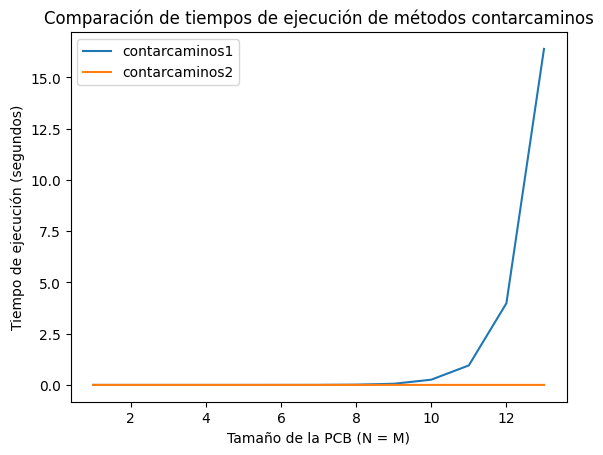

In [6]:
from time import perf_counter

import matplotlib.pyplot as plt


t_contarcaminos1 = []
t_contarcaminos2 = []
x = []
for i in range(1,14):
    x.append(i)

for n in range(1,14):
    pcb = CaminosPCB2(n, n)
    
    tiempo_inicio = perf_counter()
    pcb.contarcaminos1(pcb.grilla)
    tiempo_total = perf_counter() - tiempo_inicio
    t_contarcaminos1.append(tiempo_total)

    tiempo_inicio = perf_counter()
    pcb.contarcaminos2()
    tiempo_total = perf_counter() - tiempo_inicio
    t_contarcaminos2.append(tiempo_total)


# Generación de gráficos
plt.figure()
plt.plot(x, t_contarcaminos1, label='contarcaminos1')
plt.plot(x, t_contarcaminos2, label='contarcaminos2')
plt.xlabel('Tamaño de la PCB (N = M)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos de ejecución de métodos contarcaminos')
plt.legend()



Como se puede ver, despues de N=M=10, el metodo contarcaminos1 es empieza a demorar exponencialmente mas que el el metodo contarcaminos2, el cual se mantiene constante para todo valor N=M (por lo menos hasta la iteracion 15)